Introduction to Image Processing - Basic Image Manipulations
<html>
    <summary></summary>
         <div> <p></p> </div>
         <div style="font-size: 20px; width: 800px;"> 
              <h1>
               <left>Basic Image Manipulation in Python</left>
              </h1>
              <p><left>============================================================================</left> </p>
<pre>Course: BIOM 421, Spring 2024
Instructor: Brian Munsky
Authors: Dr. Luis Aguilera, Will Raymond, Brian Munsky
Contact Info: munsky@colostate.edu
</pre>
         </div>
    </p>

</html>

<details>
  <summary>Copyright info</summary>

```
Copyright 2024 Brian Munsky

Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its contributors may be used to endorse or promote products derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
```
<details>



# Abstract

This notebook provides a list of procedures to analyze microscope images. The notebook describes what a digital image is, and how to extract relevant information from the image. At the end of the tutorial, you should have obtained the computational skills to implement the following list of objectives independently.

## List of objectives


1. Load the python modules commonly used to work with microscope data.
2. Understand and explain what a digital image is in terms of matrices and tensors.
3. Understand and explain what a monochromatic image is and a color image is.
4. Select and slice the dimensions in a sequence of microscope images.
5. Apply differents filters to remove noise from an image using linear algebra operations.
6. Perform basic mathematic operations involved in image processing, including rotation, translation, and scaling.

# Importing Libraries

The following lines of code import and install some libraries. For more information, look at the library name on the  Python Package Index [(PyPI)](https://pypi.org/).

In [2]:
# Loading libraries
import random
import matplotlib.pyplot as plt             # Library used for plotting
from matplotlib.patches import Rectangle    # Module to plot a rectangle in the image
import urllib.request                       # Library to download data
import numpy as np                          # Library for array manipulation
import seaborn as sn                        # Library for advanced plotting
import pandas as pd                         # Library to manipulate data frames
import tifffile                             # Library to store numpy arrays as TIFF
import pathlib                              # Library to work with file paths
from pathlib import Path                    # Library to work with file paths
import skimage                              # Library for image manipulation. scikit-image
from skimage.io import imread               # Module from skimage
from matplotlib import animation            # Module to plot animations

In [3]:
from biom421 import codes
students = codes.spring2024Students()

ModuleNotFoundError: No module named 'biom421'

In [ ]:
random.choice(students)

A library is a collection of code to perform a specific task. For example, check the [scikit-image library webpage](https://scikit-image.org).



Python is the most popular programming language in data science, and the most popular programming language in CS [tiobe-index](https://www.tiobe.com/tiobe-index/).


Python is an ecosistem with a comprensive list of well-mantanined libraries.

<img src= https://numpy.org/images/content_images/ds-landscape.png alt="drawing" width="1200"/>

# Working with images in python

![alt text](FigsA/Module_1_1/Slide2.png)

Image modified from: Gonzalez, Rafael & Faisal, Zahraa. (2019). Digital Image Processing Second Edition.

## Downloading, opening, and visualizing images



In [4]:
# Downloading the image from figshare SupFig1c_BG_MAX_Cell04.tif
urls = ['https://ndownloader.figshare.com/files/26751209','https://ndownloader.figshare.com/files/26751203','https://ndownloader.figshare.com/files/26751212','https://ndownloader.figshare.com/files/26751218']
print('Downloading file...')
urllib.request.urlretrieve(urls[1], './image_cell.tif') #

('./image_cell.tif', <http.client.HTTPMessage at 0x1c0f6e7eb50>)

In [5]:
# Importing the image as variable img
figName = './image_cell.tif'
img = imread(str(figName))

During this course we have been constantly using [NumPy](https://numpy.org), [Matplotlib](https://matplotlib.org),
[Scipy](https://scipy.org), [Pandas](https://pandas.pydata.org), [Scikit-Image](https://scikit-image.org), [TensorFlow](https://www.tensorflow.org), etc.

In [ ]:
# If an image is an array, how can we find the size of that array?
random.choice(students)

In [ ]:
# What should we do if we want to know the size of the image?

If you need a refresher, please checkgo back over the tutorials in Module 1 for basic Python and numpy. Also check this link for [cheatsheets](https://www.datacamp.com/resources/data-science-and-analytics-cheatsheets).


## Understanding digital images

![alt text](FigsA/Module_1_1/Slide3.png)


**Displaying** a section of the image. Notice that an image is only a matrix of numbers.

What is a digital image?

In [ ]:
# What is img?
print('Image type =', type(img))

It is essential to understand that images in Python are stored as NumPy objects.  Need a refresher?  Check out the totorials in Module 1.


What is the shape of the image?



In [ ]:
print('Image dimensions, Shape =', img.shape )   #[T,Y,X,C]

In [ ]:
# Attributes in img object
print([x for x in dir(img) if '__' not in x] ) #what functions (excluding internal functions, denoted by __xx__) does a list object have?

**Displaying** a section of the image. Notice that an image is only a matrix of numbers.

From the [image's publication](https://www.biorxiv.org/content/10.1101/2020.04.03.024414v2) we can obtain the **metadata**. Indicating that the following information:

Dimension  | Meaning |  Value
---------|---------- |----------
0   | Time        | 35 (frames)
1   | Y-dimension | 512 pixels
2   | X-dimension | 512 pixels
3   | Color       | 3 color image (R,G,B)

![alt text](FigsA/Module_1_1/Slide4.png)

High-order tensor are also refered as Hyperstacks in software like [imagej](https://imagej.net/software/fiji/).

# Slicing a high-order tensor to display it as a 2D image.

The image is a numpy array with dimensions:
```
image[time, y-axis, x-axis, colors]
```
To display our tensor we can select a 2D subsection.

```
image[selected_time, : , : , selected_color]
```


* Notice that when we slice [start: end(not including this value) :step]

In [ ]:
# How would we show just a grayscale image corresponding to the 3rd channel, at the 
# second time point?
random.choice(students)

In [ ]:
# Recall, the image shape is:
print('Image dimensions, Shape =', img.shape )   #[T,Y,X,C]

In [ ]:
# Plotting an image
plt.figure(figsize=(7,7))
selected_frame = 0
selected_color_channel = 2
plt.imshow( img[selected_frame,:,:,selected_color_channel], cmap='gray') # Notice that only a time point and a color is plotted
plt.show()

In [ ]:
# Notice the difference between plotting an image (using imshow) and ploting a time course
# (using plot). The former is used to plot an image, the latter is used to plot a line.
plt.plot([1,2,3,4])

plt.show()

In [ ]:
# How would I find the brightest pixel in the image?
random.choice(students)

#**Intensity** values in the image

In [ ]:
# Minimum and maximum intensity values on the image
max_intensity_value = np.max(img)
min_intensity_value = np.min(img)

quant_intensity_value = np.quantile(img, [0.9,0.8,0.5])    # 0.9 is equivalent to 90 percentile

print('Maximum intensity : ', max_intensity_value)
print('Minimum intensity : ', min_intensity_value)
print('Quantile intensity: ', quant_intensity_value )


To understand the parameters that you need to pass to a method use the ```help``` function
```
help(method)
```



In [ ]:
help(np.max)

In [ ]:
img[selected_frame,:,:,selected_color_channel]

In [ ]:
help(np.quantile)

Intensity distribution in the image

In [ ]:
# Plotting the intensity distribution for a specific time point and an specific channel
plt.figure(figsize=(3,2))
plt.hist(img[:,:,:,2].flatten(), bins=80,color='orangered')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Intensity Histogram')
plt.show()

Summary of image properties:

* 4 dimensional tensor [T, Y, X, C].
* Numpy array
* Intensity range (0, 6380)




In [ ]:
#Here, we show how to visualize intensity values in 3D.

# Pick a frame and a color channel
selected_frame = 0
selected_color_channel = 1

# Select the image
selected_image = img[selected_frame,:,:,selected_color_channel]

# Create a grid of X and Y values the same size as the image
space= np.arange(0, selected_image.shape[0], 1)
xx, yy = np.meshgrid(space,space)

# Create a figure
fig = plt.figure(figsize=(15,7))

# Set up the axes for the first plot and show the image
ax = fig.add_subplot(1, 2, 1)
ax.imshow(selected_image,cmap='gray') # Reds_r

# Set up the axes for the second plot and show the 3D surface
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(xx, yy , selected_image,  rstride=20, cstride=20, shade=False, cmap='gray')
ax2.view_init(20, 45)
plt.show()

## Intensity in images (Bit depth)

Bit depth is the information stored on each pixel in the image.

Bits  | Range of values: $2^n$
---------|------------------
1 bit    | 2
8 bit    | 256
12 bit   | 4096
16 bit   | 65536



In [ ]:
# Here is a function to convert bit depth in an image
# Note - you will lose information if you convert to a lower bit depth
def convert_bit_depth(img, target_type_min, target_type_max, target_type):
    '''
    This function is intended to normalize img and change the image to the specified target_type
      img: numpy array
      target_type_min: int
      target_type_max: int
      target_type: str, optins are: np.uint
    '''
    imin = img.min()
    imax = img.max()
    a = (target_type_max - target_type_min) / (imax - imin)
    b = target_type_max - a * imax
    new_img = (a * img + b).astype(target_type)
    return new_img

Check this [link](https://numpy.org/doc/stable/user/basics.types.html) for a complete list of numpy data types.

In [ ]:
# Normalizing and converting images between different bit-depths

#Convert an image to unsigned byte format, with values in [0, 1]
img_int1 = convert_bit_depth(img, 0,1,target_type=np.bool_)

#Convert an image to unsigned byte format, with values in [0, 8]
img_int3 = convert_bit_depth(img, 0,8,target_type=np.uint8)

#Convert an image to unsigned byte format, with values in [0, 255]
img_int8 = convert_bit_depth(img, 0,255,target_type=np.uint8)

In [ ]:
# Let's look at the range of values in each image
print('Range in 1-bit image: [', np.amin(img_int1),',' ,np.amax(img_int1) , ']' )
print('Range in 3-bit image: [', np.amin(img_int3),',' ,np.amax(img_int3) , ']' )
print('Range in 8-bit image: [', np.amin(img_int8),',' ,np.amax(img_int8) , ']' )
print('Range in 16-bit image: [', np.amin(img),',' ,np.amax(img) , ']' ) # notice that the max value in this particular image is ~8K, but the maximum possible range in an int16 image is 65.5K

In [ ]:
#Let's display the images for a Side-by-side comparison of the same image at different bit depths

# Create a figure
fig, ax = plt.subplots(1,4, figsize=(40, 20))

# Show the image at 1 bit
ax[0].imshow(img_int1[0,:,:,0],cmap='gray')
ax[0].set(title='1bit')

# Show the image at 3 bit
ax[1].imshow(img_int3[0,:,:,0],cmap='gray')
ax[1].set(title='3bit')

# Show the image at 8 bit
ax[2].imshow(img_int8[0,:,:,0],cmap='gray')
ax[2].set(title='8bit')

# Show the image at 16 bit
ax[3].imshow(img[0,:,:,0],cmap='gray')
ax[3].set(title='16bit')
plt.show()

The human eye cannot distinguish between a 12-bit image and a 16-bit image.

In [ ]:
# Visualizing the intensity values in images with different bit depths

# Let's zoom in to a 10x10 section of the image
min_selection_area = 200
max_selection_area = min_selection_area+10

# Extracting the 10x10 section of the image as a data frame
df_3bit = pd.DataFrame(img_int3[0,min_selection_area:max_selection_area,min_selection_area:max_selection_area,0] ) # Range in 3-bit image: [ 0 , 8 ]
df_8bit = pd.DataFrame(img_int8[0,min_selection_area:max_selection_area,min_selection_area:max_selection_area,0] ) # Range in 8-bit image: [ 0 , 255 ]
df_16bit = pd.DataFrame(img[0,min_selection_area:max_selection_area,min_selection_area:max_selection_area,0] ) # Range in 16-bit image: [ 0 , 65536 ]. In this particular image, the original maximum value is 6380

# Plotting the intensity values in the 10x10 section of the image
fig, ax = plt.subplots(1,3, figsize=(30, 7))

# Plotting the heatmap of a section in the image
sn.heatmap(df_3bit, annot=True,cmap="gray",fmt='d', ax=ax[0])
ax[0].set_title('3-bit image')
sn.heatmap(df_8bit, annot=True,cmap="gray",fmt='d', ax=ax[1])
ax[1].set_title('8-bit image')
sn.heatmap(df_16bit, annot=True,cmap="gray",fmt='d', ax=ax[2])
ax[2].set_title('16-bit image')
plt.show()

#### File size for two different data types and bit depths

---



In [ ]:
# How does the bit depth affect the file size? 
random.choice(students)

# Saving the images to disk
tifffile.imwrite('temp_img_int8.tif', img_int8)
tifffile.imwrite('temp_img_int16.tif', img)

# Loading the images
print("File size of the 8-bit image in Mb is: ", round(Path('temp_img_int8.tif').stat().st_size/1e6))

# How big do you think the file size will be for the 16-bit image? 
# Uncomment the next line to see the answer
# print("File size of the 16-bit image in Mb is: ", round(Path('temp_img_int16.tif').stat().st_size/1e6))

# What is Color in an image?

An example of a monochromatic system is the black and white television.

<img src= https://media.wired.com/photos/5eacb6979fa72e5901a7bfa3/191:100/w_5100,h_2670,c_limit/Gear-TV-binge-10079749.jpg alt="drawing" width="800"/>

Image source: https://www.wired.com/story/what-we-keep-rebinging/

In [ ]:
# Here is how to download an image from the web and display it.  Just so you know we really can do it, 
# let's also flip the image upside down and change the color map to 'hot'.

# Load an jpg image from an html link and create a numpy array
url = 'https://media.wired.com/photos/5eacb6979fa72e5901a7bfa3/191:100/w_5100,h_2670,c_limit/Gear-TV-binge-10079749.jpg'

# Download the image
urllib.request.urlretrieve(url, './image.jpg')

# Load the image
img_jpg = imread('./image.jpg')
print(f'the size of this image is {img_jpg.shape}.  Apparently it is a color image afterall!')

# Show the image upside down
plt.imshow(np.flipud(np.mean(img_jpg,2)), cmap='hot')
plt.show()

Monochromatic images are normally associated with Black and White colors, but we can associate a different color map. Notice that this will only map the color intensity to a predefined colormap.

In [ ]:
# There are lots of Colormaps

cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Cyclic', ['twilight', 'twilight_shifted', 'hsv']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c'])]


gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

def plot_color_gradients(cmap_category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows-1)*0.1)*0.22
    fig, axs = plt.subplots(nrows=nrows, figsize=(6.4, figh/2))
    fig.subplots_adjust(top=1-.35/figh, bottom=.15/figh, left=0.2, right=0.99)

    axs[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, cmap_name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=cmap_name)
        ax.text(-.01, .5, cmap_name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list)

plt.show()

Using a colormap in a monochromatic image.

In [ ]:
# Pick a color map from the list above, and visualize 
# the image in 2D and 3D using that color map

# Choose a color map
selected_color_map ='Pastel1' #'Spectral' # 'gray'

# Make a grid of X and Y values the same size as the image
space= np.arange(0, selected_image.shape[0], 1)
xx, yy = np.meshgrid(space,space)
fig = plt.figure(figsize=(15,7))

# Set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1)
ax.imshow(selected_image,cmap=selected_color_map) # coolwarm

# Set up the axes for the second plot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(xx, yy , selected_image,  rstride=20, cstride=20, shade=False, cmap=selected_color_map) #
ax2.view_init(20, 45)
plt.show()

## Color images.

In a color image each pixel in the image is assigned a combination of intensity values for the red, green, and blue color channels, which together determine the color appearance of each pixel.

Most image processing libraries use the "consensus" order RGB. A very important library for image processing ([OpenCV](https://opencv.org)) uses the order BGR!

In [ ]:
# Plotting a color image

# For many images, the color channels are stored in the last dimension. 
# For microscopy images, the colors are usually related to different fluorophores.
# For example, in this three color image, the first channel is red and corresponds
# to phosphorylated RNAP, the second is green and corresponds to phosphorylated RNAP,
# the third is blue, which correspoonds to RNA.

# Make a 3x3 grid of images
fig, ax = plt.subplots(1,4, figsize=(20, 7))
Red = img[0,:,:,0]

# Plotting the color channels
ax[0].imshow(Red,cmap='Reds_r')
ax[0].set(title='Red Channel (Ch 0) - RNAP')
Green = img[0,:,:,1]
ax[1].imshow(Green,cmap='Greens_r')
ax[1].set(title='Green Channel (Ch 1) - RNAP-Phos')
Blue = img[0,:,:,2]
ax[2].imshow(Blue,cmap='Blues_r')
ax[2].set(title='Blue Channel (Ch 2) - RNA')

# Now to create a merged color image. 
# We need to rescale the image to avoid saturation of the colors.
number_channels =3
rescaled_image = np.zeros_like(img_int8)
# Rescaling image to avoid saturation
color_image = img[0,:,:,:].copy()
rescaled_image = np.zeros_like(color_image)
for index_channels in range (number_channels):
  normalized_image_temp = color_image[ :, :, index_channels]
  # Pick a percentile value to avoid saturation
  max_val = np.percentile(color_image[:,:,index_channels], 97)
  # Set values above the percentile to the percentile value
  normalized_image_temp [normalized_image_temp > max_val] = max_val
  # Saved the thresholded image in the rescaled image
  rescaled_image[:,:,index_channels] = normalized_image_temp

# to show a color image in matplotlib, we need to convert it to uint8.
img_int8_color = convert_bit_depth(rescaled_image, 0,255,target_type=np.uint8)

# Now, let's plot the color image
ax[3].imshow(img_int8_color)
ax[3].set(title='Color image')
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[3].axis('off')
plt.show()

## Working with images in Python

### Basic image manipulation

#### Slicing

In this section, we select parts of the image.

The image is a numpy array with dimensions:
```
image[time, y-axis, x-axis, colors]
```

If we need to select the following elements:
* timepoint (frame) 5
* y-axis from 100 to 200 pixel
* x-axis from 230 to 300 pixel
* "Green" color (Color 1 in the standard format [R,G,B]),

We would slice the numpy array as follows:

```
image[5, 99:200, 229:300, 1]
```

* Notice that when we slice [start: end(not including this value) :step]


In [ ]:
# How would you crop the image to only show the middle 3rd of the image in both directions?
random.choice(students)

In [ ]:
# Recall that the image shape is:
print('Image shape: ', img_int8.shape)

In [ ]:
# Ploting a subsection of the image
# Time point: 0
# Y-range: [99:200]
# X-range: [229:300]
# Channel: Green (1)
plt.figure(figsize=(7,7))
plt.imshow(img[5, 99:200, 229:300 , 1],cmap='gray') 
# Notice that only one time point and one color is plotted
plt.show()

In [ ]:
# Ploting a subsection of the image
# Time point: 22
# Y-range: [230:300]
# X-range: [155:350]
# Channel: Blue (2)
plt.figure(figsize=(7,7))
plt.imshow(img[22,230:300,155:350,2],cmap='gray') 
# Notice that only one time point and one color is plotted
plt.show()

#### Thresholding

In [ ]:
# How do you make a copy of an image?
img_copy = img.copy() # Making a copy of our original image
plt.imshow(img_copy[0,:,:,1],cmap='gray') 

## Applying thresholds to images.
How would you set values less than the some threshold equal to zero?

In [ ]:
random.choice(students)

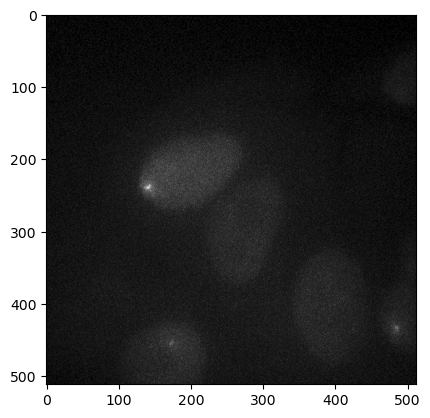

In [6]:
img_copy = img.copy() # Making a copy of our img
img_section = img_copy[0,:,:,2] # Selecting a time point and color channel # test channel 2
threshold_value = 100
img_section=img_section*(img_section >= threshold_value)  # Thresholding image values larger than 'threshold_value' and replacing with 'threshold_value'
plt.imshow(img_section,cmap='gray') 

In [ ]:
# How would you set values more than the the image mean equal to zero?
# img_section[??? ]=???  # Thresholding image values larger than the mean equal to the mean
plt.imshow(img_section,cmap='gray') 

In [ ]:
# Making a binary image.

img_copy = img.copy() # Making a copy of our img
img_section = img_copy[34,:,:,2] # Selecting a time point and color channel # test channel 2

threshold_value = 700
img_binary = img_section>threshold_value
print(np.min(img_binary) , np.max(img_binary))
plt.imshow(img_binary)

In [ ]:
# Plotting the image as the 3d dimension figure. Thresholding.

# Plotting the image as the 3d dimension figure.
space= np.arange(0, img_section.shape[0], 1)
xx, yy = np.meshgrid(space,space)
color_map = 'Greys_r'

#create a figure with 2x2 subplots
fig, ax = plt.subplots(2,2, figsize=(15, 15))
# show the image in 2D
ax[0][0].imshow(img_section,cmap=color_map) # coolwarm
ax[0][0].set_title('Original Image')

# show the image in 3D
ax[0][1] = fig.add_subplot(2, 2, 2, projection='3d')
ax[0][1].plot_surface(xx, yy , img_section,  rstride=20, cstride=20, shade=False, cmap=color_map) #
ax[0][1].view_init(20, 45)

# show the binary image in 2D
ax[1][0].imshow(img_binary,cmap=color_map) # coolwarm
ax[1][0].set_title('Binary Image')

# show the binary image in 3D
ax[1][1] = fig.add_subplot(2, 2, 4, projection='3d')
ax[1][1].plot_surface(xx, yy , img_binary,  rstride=20, cstride=20, shade=False, cmap=color_map) #
ax[1][1].view_init(20, 45)

plt.show()



## Filters

[Filters](https://ai.stanford.edu/~syyeung/cvweb/tutorial1.html) are used for:

*   Noise reduction
*   Edge detection
*   Sharpening
*   Blurring

The mathematical operation is a 2D convolution. This convolution involves defining a smaller kernel matrix and applying the same mathematical operation to each pixel in the entire image. A more complete explanation can be found in this amizing [video](https://youtu.be/8rrHTtUzyZA?t=72) by 3Blue1Brown.


![alt text](FigsA/Module_1_1/Slide5.png)

##### Gaussian Filter. Noise reduction and blurring.

$G_\sigma = \frac{1}{2\pi\sigma^2}e{\frac{x^2+y^2}{2\sigma^2}}$

In [ ]:
#@title Section that creates the Gaussian Kernel Matrix
def gaussian_kernel (size_matrix,sigma):
  '''
  This function returns a normalized gaussian kernel matrix
  size_matrix : int
  sigma: float
  '''
  ax = np.linspace(-(size_matrix - 1) / 2., (size_matrix - 1) / 2., size_matrix)
  xx, yy = np.meshgrid(ax, ax)
  kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))
  kernel = kernel/kernel.sum() # Normalizing to the sum
  return kernel

# Gaussian kernel matrix for different sigmas
kernel_gaussian_sigma_3 = gaussian_kernel (size_matrix=20,sigma=3)
kernel_gaussian_sigma_5 = gaussian_kernel (size_matrix=20,sigma=5)
kernel_gaussian_sigma_10 = gaussian_kernel (size_matrix=20,sigma=10)


#print(sum(kernel_gaussian_sigma_3.flatten()))
#print(sum(kernel_gaussian_sigma_5.flatten()))
#print(sum(kernel_gaussian_sigma_10.flatten()))


# Side-by-side comparison
fig, ax = plt.subplots(1,3, figsize=(20, 10))
ax[0].imshow(kernel_gaussian_sigma_3,cmap='gray')
ax[0].set(title='Gaussian kernel $\sigma$ =3')
ax[1].imshow(kernel_gaussian_sigma_5,cmap='gray')
ax[1].set(title='Gaussian kernel $\sigma$ =5')
ax[2].imshow(kernel_gaussian_sigma_10,cmap='gray')
ax[2].set(title='Gaussian kernel $\sigma$ =10')


plt.show()

In [ ]:
# Visualizing a Gaussian Kernel in 3D
size_spot = 20
spot_sigma = 3
space = np.linspace(-(size_spot - 1) / 2., (size_spot - 1) / 2., size_spot)
xx, yy = np.meshgrid(space, space)
kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(spot_sigma))
#kernel = kernel / np.amax(kernel) * 255  # Normalizing with respect to max and changing the range to [0,255]
kernel = kernel/kernel.sum()
print('Sum of the intensity in the kernel is: ',sum(kernel.flatten()))
# Plotting
fig = plt.figure(figsize=plt.figaspect(0.3))
# Set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1)
ax.imshow(kernel,cmap='gray') # Reds_r
# Set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(xx, yy, kernel, cmap='gray')
plt.show()

Example using [gaussian filter scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html). For a complete  list of filters in scipy, use the following [link](https://docs.scipy.org/doc/scipy/reference/ndimage.html).

In [ ]:
# Importing the library with the filter modules
from scipy.ndimage import gaussian_filter

img_copy = img.copy() # Making a copy of our img
img_section = img_copy[0,:,:,0] # Selecting a timepoint and color channel

# Applying the filter
img_gaussian_filter_simga_1 = gaussian_filter(img_section, sigma=1)
img_gaussian_filter_simga_10 = gaussian_filter(img_section, sigma=10)

# Side-by-side comparison
fig, ax = plt.subplots(1,3, figsize=(30, 10))
ax[0].imshow(img_section,cmap='gray')
ax[0].set(title='Original')

# Noise reduction
ax[1].imshow(img_gaussian_filter_simga_1,cmap='gray')
ax[1].set(title='Gaussian Filter $\sigma$ =1 Noise reduction')

# Blurring
ax[2].imshow(img_gaussian_filter_simga_10,cmap='gray')
ax[2].set(title='Gaussian Filter $\sigma$ =10 Image Blurring')
plt.show()

Filters in scikit-image ([difference of gaussians](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.difference_of_gaussians)).

This filter is used to locate elements between a low and a high value.

 For a complete list of filters in scikit-image, use the following [link](https://scikit-image.org/docs/stable/api/skimage.filters.html).

In [ ]:
# Importing skimage filters module
from skimage.filters import difference_of_gaussians

img_copy = img.copy() # Making a copy of our img
img_section = img_copy[0,:,:,0] # Selecting a time point and color channel

# Applying the filter to our image
img_diff_gaussians = difference_of_gaussians(img_section,low_sigma=1, high_sigma=10)
#img_diff_gaussians = difference_of_gaussians(img_section,low_sigma=5, high_sigma=10)

# Side-by-side comparison
fig, ax = plt.subplots(1,2, figsize=(20, 10))
ax[0].imshow(img_section,cmap='gray')
ax[0].set(title='Original')
ax[1].imshow(img_diff_gaussians,cmap='gray')
ax[1].set(title='Difference of Gaussians')
plt.show()

#### Rotation


Library ([rotate scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.rotate.html#scipy.ndimage.rotate)).

In [ ]:
# Importing skimage rotation module
from scipy import ndimage as nd

img_copy = img.copy() # Making a copy of our img
img_section = img_copy[0,:,:,0] # Selecting a time point and color channel

# Rotating the image to a given angle
selected_angle = 90
img_rotation = nd.rotate(img_section, angle=selected_angle)

# Side-by-side comparison
fig, ax = plt.subplots(1,2, figsize=(20, 10))
ax[0].imshow(img_section,cmap='gray')
ax[0].set(title='Original')
ax[1].imshow(img_rotation,cmap='gray')
ax[1].set(title= 'Image rotated by '+str(selected_angle)+ ' degrees' )
plt.show()


#### Image transformation

Consists of applying rotation, scaling, and translation processes to the image.

List of available [transformations in skimage](https://scikit-image.org/docs/stable/auto_examples/transform/plot_transform_types.html). Blog with more information about [applying transformations to images](https://towardsdatascience.com/image-processing-with-python-applying-homography-for-image-warping-84cd87d2108f).

In [ ]:
# Importing skimage transformation module
from skimage import transform

img_copy = img.copy() # Making a copy of our img
img_section = img_copy[0,:,:,0] # Selecting a timepoint and color channel

#  Transformation matrix
tform = transform.SimilarityTransform(
    scale = 0.95,                  # float, scaling value
    rotation = np.pi/90,           # Rotation angle in counter-clockwise direction as radians. pi/180 rad = 1 degrees
    translation=(100, 1))          # (x, y) values for translation
print('Transformation matrix : \n', tform.params , '\n')

# Applying the transformation
tf_img = transform.warp(img_section, tform.inverse)

# Side-by-side comparison
fig, ax = plt.subplots(1,2, figsize=(20, 10))
ax[0].imshow(img_section,cmap='gray')
ax[0].set(title='Original')
ax[1].imshow(tf_img,cmap='gray')
ax[1].set_title('Transformation')
plt.show()

This process is used before merging images taken from multiple cameras. Image registration [Check this video](https://www.youtube.com/watch?v=nNZJw0kgzdg&list=LL&index=7)

![alt text](FigsA/Module_1_1/Slide7.png)

## Working with a sequence of images

### Video

In [ ]:
#  %conda install -c conda-forge ffmpeg


# Visualizing all frames (time points).
# blit=True re-draws only the parts that have changed
fig,axes = plt.subplots(1,3,dpi=120,figsize=(8,3))
i=0
# Define inital frames
Red = img[i,:,:,0]
im1 = axes[0].imshow(Red,cmap='Reds_r')
Green = img[i,:,:,1]
im2 = axes[1].imshow(Green,cmap='Greens_r')
Blue = img[i,:,:,2]
im3 =  axes[2].imshow(Blue,cmap='Blues_r')
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')

def movieFrame(i):
  Red = img[i,:,:,0]
  Green = img[i,:,:,1]
  Blue = img[i,:,:,2]
  images = [Red,Green,Blue]
  image_handles = [im1,im2,im3]
  for k,image_n in enumerate(images):
    image_handles[k].set_array(images[k])
  return image_handles

plt.close()
anim = animation.FuncAnimation(fig, movieFrame, frames=img.shape[0], interval=20, blit=True)
from IPython.display import HTML
HTML(anim.to_html5_video())

### Images with 3-dimensional space, fluorescence in situ hybridization (FISH) images.

In [ ]:
# # Images with a 3D space

# Downloading the image to our local drive
# You can skip this, since I provide the files over GitHub
# found_files = list(Path('.').rglob('FISH_example.zip'))
# if len(found_files) != 0:
#   print(f"File already downloaded and can be found in {found_files[0]}.")
# else:
#   !wget --no-check-certificate 'https://www.dropbox.com/s/6y7yqlmlnnxm7rs/FISH_example.zip?dl=0' -r -A 'uc*' -e robots=off -nd -O 'FISH_example.zip'
#   # !wget --no-check-certificate 'https://www.dropbox.com/s/1ZR6nY9kscgLEefZFwBPwsbog-JlVwE2B/FISH_example.zip?dl=0' -r -A 'uc*' -e robots=off -nd -O 'FISH_example.zip'
#   !unzip Module4-ImageProcessing/FISH_example.zip

# Importing the image as variable img.
# You might need to change the path to the file depending on your local setup.
figName_FISH = 'FISH_example.tif'
img_FISH = imread(figName_FISH)

# This image has dimension [Z,Y,X]
print(f"The shape of the image is {img_FISH.shape}")

#Removing outliers
max_val = np.percentile(img_FISH, 99)
img_FISH [img_FISH> max_val] = max_val


In [ ]:
# Plotting the FISH image
fig, ax = plt.subplots(5,img_FISH.shape[0]//5+1, figsize=(30, 30))

for i in range (0,img_FISH.shape[0]):
  ax[i//5,i%5].imshow(img_FISH[i,:,:],cmap='gray')
  ax[i//5,i%5].set(title= 'z = '+ str(i))
  ax[i//5,i%5].axis('off')
plt.show()

In [ ]:
# FISH visualizer
def FISH_viewer(z_value=1):
    '''
    This function is intended to display an image from an array of images (specifically, video: img_int8). 
         img_int8 is a numpy array with dimension [T,Y,X,C].
    drop_channel : str with options 'Ch_0', 'Ch_1', 'Ch_2', 'All'
    time: int with range 0 to the number of frames in video.
    '''
    plt.figure(1)
    temp_FISH_image = img_FISH[z_value,:,:]
    plt.imshow(temp_FISH_image,cmap='gray')
    plt.show()

# Defining an interactive plot
# %pip install ipywidgets
from ipywidgets import interactive, HBox, VBox, Layout
import ipywidgets as widgets

interactive_plot = interactive(FISH_viewer,z_value = widgets.IntSlider(min=0,max=img_FISH.shape[0]-1,step=1,value=0,description='z-value'))       
# time slider parameters
# Creates the controls
controls = HBox(interactive_plot.children[:-1], layout = Layout(flex_flow='row wrap'))
# Creates the outputs
output = interactive_plot.children[-1]

# Display the controls and output as an interactive widget
display(VBox([controls, output]))

## Operations on multiple images

![alt text](FigsA/Module_1_1/Slide6.png)

Maximum projections

In [ ]:
# Making a copy of our sequence of images
img_FISH_copy = img_FISH.copy() # Making a copy of our img

# Applying a maximum projection
img_max_z_projection = np.max(img_FISH, axis=0)
#img_max_z_projection = np.mean(img_FISH, axis=0)

# Plotting
plt.figure(figsize=(7,7))
plt.imshow(img_max_z_projection,cmap='Greys_r')
plt.axis('off')
plt.show()

# Printing results
print('Dimensions on the original sequence of images :', img_FISH.shape, '\n')
print('Dimensions on the maximum projection :', img_max_z_projection.shape)

Normalizing intensity for every channel and time point

Max-Min Normalization

$img_{norm} = \frac{img-min(img)}{max(img)-min(img)}$

In [ ]:
img_normalized = np.zeros_like(img)   # Preallocating memory
number_timepoints, y_dim, x_dim, number_channels = img.shape[0], img.shape[1], img.shape[2], img.shape[3] # Obtaining the dimensions size

# Normalization using a nested for-loop
for index_channels in range (number_channels): # Iteration for every channel
    for index_time in range (number_timepoints): # Iterating for every time point
        max_val = np.amax(img[index_time,:,:,index_channels])
        min_val = np.amin(img[index_time,:,:,index_channels])
        img_normalized[index_time,:,:,index_channels] = (img[index_time,:,:,index_channels]-min_val) / (max_val-min_val) # Normalization

# Printing the output
print('Range values in the original sequence of images: (' , np.amin(img) ,',', np.amax(img) ,')\n' )
print('Range values in the normalized sequence of images: (' , np.amin(img_normalized) ,',', np.amax(img_normalized) ,')\n' )


Transposing dimensions

In [ ]:
# Making a copy of our sequence of images
img_int8_copy = img_int8.copy() # Making a copy of our img [T, Y, X, C]

# Reshaping the video. Changing the Time position (0) to the last place (3).  [C, Y, X, T]
img_transposed = np.transpose(img_int8_copy, (3, 1, 2, 0))

# Printing results
print('Dimensions on the original sequence of images :', img_int8_copy.shape, '\n')
print('Dimensions on the maximum projection :', img_transposed.shape)

# References

* Images downloaded from https://figshare.com from publication: "Forero-Quintero, L.S., Raymond, W., Handa, T. et al. Live-cell imaging reveals the spatiotemporal organization of endogenous RNA polymerase II phosphorylation at a single gene. Nat Commun 12, 3158 (2021). https://doi.org/10.1038/s41467-021-23417-0"

* Gonzalez, Rafael & Faisal, Zahraa. (2019). Digital Image Processing Second Edition.
>
